In [1]:
import pandas as pd
import numpy as np

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
# nltk.download('stopwords')
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('data/airbnb.csv.zip')

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (61,62,94,95) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.shape

(48377, 106)

In [4]:
df[['id','neighborhood_overview','neighbourhood_cleansed']].isnull().sum()

id                            0
neighborhood_overview     16946
neighbourhood_cleansed        0
dtype: int64

In [5]:
print(list(df.columns))

['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price', '

# Remap Neighborhoods to Unique IDs

In [6]:
neighborhood_map = {
'Allerton': 1,
'Pelham Gardens': 1,
'Arden Heights': 2,
'Astoria': 3,
'Bath Beach': 4,
'Battery Park City': 5,
'Financial District': 5,
'Bay Terrace': 6,
'Bayside': 7,
'Bayswater': 8,
'Far Rockaway': 8,
'Bedford-Stuyvesant': 9,
'Bellerose': 10,
'Belmont': 11,
'Bensonhurst': 12,
'Borough Park': 13,
'Breezy Point': 14,
'Neponsit': 14,
'Belle Harbor': 14,
'Briarwood': 15,
'Jamaica Hills': 15,
'Brighton Beach': 16,
'Brooklyn Heights': 17,
'Cobble Hill': 17,
'Brownsville': 18,
'Bushwick': 19,
'Cambria Heights': 20,
'Canarsie': 21,
'Castle Hills': 22,
'Clason Point': 22,
'Castleton Corners': 23,
'Westerleigh': 23,
'Charleston': 24,
'Pleasant Plains': 24,
'Tottenville': 24,
'Chelsea': 25,
'Flatiron District': 25,
'Chelsea, Staten Island': 26,
'Bloomfield': 26,
"Bull's Head": 26,
'Willowbrook': 26,
'Emerson Hill': 26,
'Chinatown': 27,
'Two Bridges': 27,
'City Island': 28,
'Claremont Village': 29,
'Clinton Hill': 30,
'Co-op City': 31,
'College Point': 32,
'Concord': 33,
'Arrochar': 33,
'Fort Wadsworth': 33,
'Concourse': 34,
'Concourse Village': 35,
'Corona': 36,
'Crown Heights': 37,
'Cypress Hills': 38,
'Ditmars Steinway': 39,
'Dongan Hills': 40,
'South Beach': 40,
'Douglaston': 41,
'Little Neck': 41,
'DUMBO': 42,
'Vinegar Hills': 42,
'Downtown Brooklyn': 42,
'Boerum Hill': 42,
'Dyker Heights': 43,
'East Elmhurst': 44,
'East Flatbush': 45,
'East Harlem': 46,
'East Morrisania': 47,
'East New York': 48,
'East Village': 49,
'Eastchester': 50,
'Baychester': 50,
'Edenwald': 50,
'Elmhurst': 51,
'Eltingville': 52,
'Great Kills': 52,
'Bay Terrace, Staten Island': 52,
'Flatbush': 53,
'Flatlands': 54,
'Flushing': 55,
'Fordham': 56,
'Forest Hills': 57,
'Fort Greene': 58,
'Fort Hamilton': 59,
'Bay Ridge': 59,
'Fresh Meadows': 60,
'Glen Oaks': 61,
'Glendale': 62,
'Gowanus': 63,
'Park Slope': 63,
'South Slope': 63,
'Gramercy': 64,
'Gravesend': 65,
'Greenpoint': 66,
'Grymes Hills': 67,
'Tompkinsville': 67,
'Harlem': 68,
"Hell's Kitchen": 69,
'Highbridge': 70,
'Mount Eden': 70,
'Hollis': 71,
'Hollis Hills': 72,
'Howard Beach': 73,
'Howland Hook': 74,
'Port Ivory': 74,
'Mariners Harbor': 74,
'Graniteville': 74,
'Hunts Point': 75,
'Jackson Heights': 76,
'Jamaica': 77,
'Jamaica Estates': 78,
'Holliswood': 78,
'Kensington': 79,
'Kew Gardens': 80,
'Kew Gardens Hills': 81,
'Kingsbridge': 82,
'Spuyten Duyvil': 82,
'Kips Bay': 83,
'Murray Hill': 83,
'Laurelton': 84,
'Long Island City': 85,
'Longwood': 86,
'Lower East Side': 87,
'Alphabet City': 87,
'Manhattan Beach': 88,
'Sheepshead Bay': 88,
'Gerritsen Beach': 88,
'Marble Hill': 89,
'Inwood': 89,
'Melrose': 90,
'Middle Village': 91,
'Midtown': 92,
'Theater District': 92,
'Midwood': 93,
'Mill Basin': 94,
'Bergen Beach': 94,
'Morningside Heights': 95,
'Morrisania': 96,
'Mott Haven': 97,
'Port Morris': 97,
'Mount Hope': 98,
'Navy Yard': 99,
'New Dorp': 100,
'New Dorp Beach': 100,
'Grant City': 100,
'Midland Beach': 100,
'New Springville': 101,
'Lighthouse Hill': 101,
'Todt Hill': 101,
'North Riverdale': 102,
'Fieldston': 102,
'Riverdale': 102,
'Norwood': 103,
'Ozone Park': 104,
'Parkchester': 105,
'Pelham Bay': 106,
'Van Nest': 106,
'Bronxdale': 106,
'Morris Park': 106,
'Port Richmond': 107,
"Prince's Bay": 107,
'Huguenot': 108,
'Prospect Heights': 109,
'Prospect-Lefferts Gardens': 110,
'Queens Village': 111,
'Randall Manor': 112,
'New Brighton': 112,
'St. George': 112,
'Red Hook': 113,
'Columbia St': 113,
'Carroll Gardens': 113,
'Rego Park': 114,
'Richmond Hill': 115,
'Richmondtown': 116,
'Oakwood': 116,
'Ridgewood': 117,
'Rockaway Beach': 118,
'Arverne': 118,
'Edgemere': 118,
'Rosedale': 119,
'Rossville': 120,
'Woodrow': 120,
'Sea Gate': 121,
'Coney Island': 121,
'Soundview': 122,
'South Ozone Park': 123,
'Springfield Gardens': 124,
'St. Albans': 125,
'Stapleton': 126,
'Clifton': 126,
'Rosebank': 126,
'Shore Acres': 126,
'Stuyvesant Town': 127,
'Sunnyside': 128,
'Maspeth': 128,
'Sunset Park': 129,
'Throgs Neck': 130,
'Schuylerville': 130,
'Country Club': 130,
'Tremont': 131,
'West Farms': 131,
'Tribeca': 132,
'Civic Center': 132,
'Soho': 132,
'Little Italy': 132,
'Nolita': 132,
'Unionport': 133,
'University Heights': 134,
'Morris Heights': 134,
'Upper East Side': 135,
'Roosevelt Island': 135,
'Upper West Side': 136,
'Wakefield': 137,
'Woodlawn': 137,
'Washington Heights': 138,
'West Brighton': 139,
'Silver Lake': 139,
'West Village': 140,
'Greenwich Village': 140,
'Noho': 140,
'Westchester Square': 141,
'Whitestone': 142,
'Williamsbridge': 143,
'Olinville': 143,
'Williamsburg': 144,
'Windsor Terrace': 145,
'Woodhaven': 146,
'Woodside': 147
}

In [7]:
df['neighborhood_id'] = df['neighbourhood_cleansed'].map(neighborhood_map)
df.groupby('neighborhood_id').count()['id']

neighborhood_id
1.0        77
2.0         5
3.0       919
4.0        27
5.0       832
6.0         6
7.0        41
8.0        51
9.0      3785
10.0       11
11.0       27
12.0       80
13.0      132
14.0       14
15.0       60
16.0       80
17.0      241
18.0       65
19.0     2411
20.0       30
21.0      150
22.0       20
23.0        7
24.0        8
25.0     1162
26.0        8
27.0      433
28.0       15
29.0       29
30.0      561
         ... 
118.0     169
119.0      63
120.0       2
121.0      23
122.0      16
123.0      40
124.0      92
125.0      72
126.0      61
127.0      36
128.0     490
129.0     407
130.0      40
131.0      13
132.0     601
133.0      11
134.0      40
135.0    1830
136.0    1903
137.0      63
138.0     928
139.0      22
140.0    1122
141.0      10
142.0      10
143.0      47
144.0    3815
145.0     151
146.0      93
147.0     246
Name: id, Length: 145, dtype: int64

# Pull Quantitative Features

In [8]:
df2 = df[['id','neighborhood_id','neighbourhood_cleansed','accommodates','price']]
df2['price_norm'] = df2.price.str.replace('[\$\,\.]', '').astype(int)/100/df2['accommodates']
df2.drop(['accommodates','price'],axis=1,inplace=True)
neighborhood_quant = df2.groupby('neighborhood_id').agg({'neighbourhood_cleansed':'first','id':'count','price_norm':'mean'}).reset_index()
neighborhood_quant.sort_values(by='price_norm',ascending=False)
neighborhood_quant.columns=['neighborhood_id','neighborhood','num_listings','price_norm']
neighborhood_quant.head()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,neighborhood_id,neighborhood,num_listings,price_norm
0,1.0,Allerton,77,31.006370
1,2.0,Arden Heights,5,28.170000
2,3.0,Astoria,919,59.324403
3,4.0,Bath Beach,27,40.018519
4,5.0,Financial District,832,84.430094


# Pull Word Features

In [9]:
def clean(text):
  for c in ",.!-/:;()*&[]_~`+=\|'?<>^%$#@•–0123456789":
    text = text.replace(c, " ")
  return text.lower()

In [10]:
neighborhoods = df.neighbourhood_cleansed.unique()
neighborhood_words = [words for segments in neighborhoods for words in str(segments).lower().split()]
print(neighborhood_words)

['harlem', 'clinton', 'hill', 'east', 'harlem', 'murray', 'hill', 'bedford-stuyvesant', "hell's", 'kitchen', 'upper', 'west', 'side', 'east', 'village', 'chinatown', 'south', 'slope', 'west', 'village', 'williamsburg', 'fort', 'greene', 'chelsea', 'crown', 'heights', 'park', 'slope', 'windsor', 'terrace', 'inwood', 'greenpoint', 'bushwick', 'flatbush', 'lower', 'east', 'side', 'prospect-lefferts', 'gardens', 'long', 'island', 'city', 'kips', 'bay', 'soho', 'upper', 'east', 'side', 'red', 'hook', 'prospect', 'heights', 'washington', 'heights', 'woodside', 'brooklyn', 'heights', 'carroll', 'gardens', 'gowanus', 'flatlands', 'cobble', 'hill', 'flushing', 'boerum', 'hill', 'sunnyside', 'dumbo', 'st.', 'george', 'highbridge', 'financial', 'district', 'noho', 'ridgewood', 'morningside', 'heights', 'jamaica', 'middle', 'village', 'ditmars', 'steinway', 'flatiron', 'district', 'roosevelt', 'island', 'midtown', 'little', 'italy', 'tompkinsville', 'gramercy', 'astoria', 'kensington', 'clason', '

In [11]:
sw = stopwords.words("english")
sw.extend(['rockaway','empire','state','new','york','city','nyc','neighborhoods','neighborhood','one',
           'walk','away','blocks','block','area','walking','apartment','around','minutes','public','many',
           'street','streets','right','best','distance','located','also','building','close','within','minute',
           'avenue','bed','near','fidi','please','hidden','number','could','go','lot','set','upon','departure',
           'stuy', 'mi', 'hell', 'subway', 'etc', 'grand', 'central', 'take', 'ave','ditmas','attractions',
           'plenty','th', 'location', 'st', 'airbnb', 'far', 'min', 'mins', 'everything', 'get','like','even',
           'along','dozen','would','return','hudson','pratt','yankees','yankee','several','atmosphere','https','www','com',
           'lots', 'nearby', 'find', 'it’s', 'place', 'lined', 'bus','predominantly','easy','access',"you're",'two',
           'ny', 'high', 'miles', 'line','highlights','tompkins','highline','rockefeller','united','nations','bedford',
           'manhattan','brooklyn','queens','bronx','staten','island','times','broadway','blvd','hell’s','madison',
           'whole','foods','trader','joes','jfk','newark','intl',
           'a','b','c','d','e','f','g','l','m','n','q','r','s','w','1','2','3','4','5','6','7'])
sw.extend(neighborhood_words)
print(sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [12]:
nb_maps = {}
for neighborhood_id in range(1,148):
  words = df[df['neighborhood_id']==neighborhood_id].dropna(subset=['neighborhood_overview'])
  words_str = clean(words.neighborhood_overview.str.cat(sep=' '))
  words_top = pd.DataFrame(Counter(words_str.split()).most_common(), columns=['word','freq'])
  words_cleaned = words_top[~words_top.word.isin(sw)]
  words_cleaned['freq_norm'] = words_cleaned.freq/len(words)
  print(neighborhood_id,words_cleaned.word[:10].tolist())
  nb_maps[neighborhood_id] = words_cleaned

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


1 ['zoo', 'quiet', 'restaurants', 'safe', 'parks', 'mall', 'botanical', 'plaza', 'community', 'parkway']
2 ['friendly', 'restaurants', 'parks', 'shopping', 'quiet', 'family', 'starbucks', 'liberty', 'safest', 'entire']
3 ['restaurants', 'bars', 'food', 'greek', 'museum', 'safe', 'shops', 'stores', 'diverse', 'coffee']
4 ['restaurants', 'verrazano', 'bridge', 'good', 'water', 'path', 'residential', 'cultures', 'quiet', 'safe']
5 ['walkability', 'score', 'bar', 'tavern', 'grocery', 'dead', 'rabbit', 'top', 'live', 'grog']
6 ['shopping', 'museum', 'totten', 'large', 'book', 'want', 'parks', 'sound', 'marina', 'bike']
7 ['restaurants', 'safe', 'quiet', 'bell', 'bank', 'shopping', 'express', 'bars', 'path', 'night']
8 ['phone', 'boardwalk', 'rockaways', 'transportation', 'beaches', 'shopping', 'airport', 'beautiful', 'available', 'restaurants']
9 ['restaurants', 'bars', 'coffee', 'shops', 'historic', 'cafes', 'train', 'brownstones', 'beautiful', 'food']
10 ['quiet', 'tree', 'restaurants', '

82 ['restaurants', 'shopping', 'safe', 'night', 'local', 'quiet', 'bars', 'stores', 'bank', 'transportation']
83 ['restaurants', 'bars', 'station', 'safe', 'quiet', 'residential', 'score', 'walkability', 'restaurant', 'stores']
84 ['safe', 'quiet', 'beautiful', 'home', 'food', 'mall', 'ride', 'community', 'another', 'residential']
85 ['restaurants', 'bars', 'museum', 'safe', 'train', 'food', 'station', 'moma', 'moving', 'ps']
86 ['train', 'shopping', 'food', 'stadium', 'restaurants', 'store', 'ride', 'mexican', 'house', 'chinese']
87 ['restaurants', 'bars', 'galleries', 'shops', 'les', 'bridge', 'art', 'museum', 'river', 'shopping']
88 ['restaurants', 'train', 'safe', 'stores', 'quiet', 'shopping', 'russian', 'shops', 'beautiful', 'bars']
89 ['restaurants', 'cloisters', 'parks', 'tryon', 'river', 'bars', 'museum', 'beautiful', 'train', 'stores']
90 ['restaurants', 'documentary', 'couple', 'cheap', 'growing', 'stores', 'bars', 'friendly', 'people', 'time']
91 ['beautiful', 'mall', 'rest

In [13]:
def get_freq(word):
  test = pd.DataFrame(columns=['neighborhood','freq','word'])
  for key in nb_maps.keys():
    words = nb_maps[key]
    if len(words.loc[words['word']==word]['freq_norm'])>0:
      test = test.append({'word':word,
                          'neighborhood':key,
                          'freq':words.loc[words['word']==word]['freq_norm'].item()
                         },ignore_index=True)
  return test.sort_values(by='freq',ascending=False)

In [14]:
all_nbs = list(nb_maps.keys())
clrs = sns.color_palette('hls', n_colors=len(all_nbs)) 
colors = {}
for i in range(len(all_nbs)):
  colors[all_nbs[i]] = clrs[i]

In [15]:
words = ['restaurants','bars','galleries','art','quaint','charming','quiet','zoo','safe','parks',
         'botanical','community','friendly','shopping','family','museum','walkability','museums',
        'garden','stores','bike','boardwalk','food','residential','shops','historic','views','beautiful',
        'coffee','artists','train','pier','ferry','diverse','airport','pizza','nightlife','seafood',
        'cafes','schools','churches','hospitals','stadium','grocery','beer','chinese','night','cute']

In [16]:
all_words = pd.DataFrame(columns=['neighborhood','freq','word'])
for word in words:
  freqs = get_freq(word)
#   freqs.plot(x='neighborhood',y='freq',title=word,kind='bar',legend=False,
#              color=freqs['neighborhood'].apply(lambda x: colors[x]))
#   plt.savefig('images/barchart_'+word+'.png',bbox_inches = "tight")
  all_words = all_words.append(freqs)

In [17]:
neighborhood_words = pd.pivot_table(all_words,values=['freq'],index='neighborhood',columns=['word'],fill_value=0).reset_index()
neighborhood_words.columns = neighborhood_words.columns.droplevel()
neighborhood_words.rename(columns={'':'neighborhood_id'},inplace=True)
neighborhood_words.head()

word,neighborhood_id,airport,art,artists,bars,beautiful,beer,bike,boardwalk,botanical,...,schools,seafood,shopping,shops,stadium,stores,train,views,walkability,zoo
0,1,0.017857,0.000000,0.000000,0.000000,0.053571,0.000000,0.035714,0.000000,0.25,...,0.000000,0.000000,0.160714,0.160714,0.089286,0.125000,0.142857,0.000000,0.000000,0.428571
1,2,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,3,0.042373,0.020339,0.011864,0.488136,0.057627,0.083051,0.005085,0.000000,0.00,...,0.001695,0.015254,0.106780,0.206780,0.000000,0.203390,0.133898,0.038983,0.000000,0.003390
3,4,0.052632,0.000000,0.000000,0.052632,0.052632,0.000000,0.157895,0.052632,0.00,...,0.000000,0.000000,0.052632,0.157895,0.000000,0.000000,0.052632,0.000000,0.000000,0.000000
4,5,0.029801,0.001656,0.000000,0.096026,0.033113,0.003311,0.031457,0.000000,0.00,...,0.000000,0.000000,0.102649,0.048013,0.000000,0.021523,0.018212,0.077815,0.490066,0.000000


# Merge and Run Simple Clustering Algorithm

In [18]:
merged = pd.merge(neighborhood_quant,neighborhood_words)
merged.head()

,neighborhood_id,neighborhood,num_listings,price_norm,airport,art,artists,bars,beautiful,beer,...,schools,seafood,shopping,shops,stadium,stores,train,views,walkability,zoo
0,1.0,Allerton,77,31.006370,0.017857,0.000000,0.000000,0.000000,0.053571,0.000000,...,0.000000,0.000000,0.160714,0.160714,0.089286,0.125000,0.142857,0.000000,0.000000,0.428571
1,2.0,Arden Heights,5,28.170000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,...,0.000000,0.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,3.0,Astoria,919,59.324403,0.042373,0.020339,0.011864,0.488136,0.057627,0.083051,...,0.001695,0.015254,0.106780,0.206780,0.000000,0.203390,0.133898,0.038983,0.000000,0.003390
3,4.0,Bath Beach,27,40.018519,0.052632,0.000000,0.000000,0.052632,0.052632,0.000000,...,0.000000,0.000000,0.052632,0.157895,0.000000,0.000000,0.052632,0.000000,0.000000,0.000000
4,5.0,Financial District,832,84.430094,0.029801,0.001656,0.000000,0.096026,0.033113,0.003311,...,0.000000,0.000000,0.102649,0.048013,0.000000,0.021523,0.018212,0.077815,0.490066,0.000000


In [30]:
merged.to_csv('cleaned_data/airbnb.csv')

In [19]:
quant_features = merged.columns[2:]
print(quant_features)
features = merged.loc[:, quant_features].values
features = StandardScaler().fit_transform(features)
features

Index(['num_listings', 'price_norm', 'airport', 'art', 'artists', 'bars',
       'beautiful', 'beer', 'bike', 'boardwalk', 'botanical', 'cafes',
       'charming', 'chinese', 'churches', 'coffee', 'community', 'cute',
       'diverse', 'family', 'ferry', 'food', 'friendly', 'galleries', 'garden',
       'grocery', 'historic', 'hospitals', 'museum', 'museums', 'night',
       'nightlife', 'parks', 'pier', 'pizza', 'quaint', 'quiet', 'residential',
       'restaurants', 'safe', 'schools', 'seafood', 'shopping', 'shops',
       'stadium', 'stores', 'train', 'views', 'walkability', 'zoo'],
      dtype='object')


array([[-0.3953015 , -0.7411102 , -0.27728794, ..., -0.46987286,
        -0.11686906,  3.36861154],
       [-0.50760856, -0.89192811, -0.42149936, ..., -0.46987286,
        -0.11686906, -0.51628256],
       [ 0.91806721,  0.76464076, -0.07930277, ...,  0.37501307,
        -0.11686906, -0.48555459],
       ...,
       [-0.27987479, -0.18484952, -0.42149936, ..., -0.06851803,
        -0.11686906,  0.32304641],
       [-0.37034437, -0.73632697,  0.12416548, ..., -0.46987286,
        -0.11686906, -0.51628256],
       [-0.13169186, -0.27987324,  0.68412154, ..., -0.46987286,
        -0.11686906, -0.51628256]])

In [20]:
Kmean = KMeans(n_clusters=5)
Kmean.fit(features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [21]:
Kmean.labels_

array([0, 1, 3, 1, 3, 1, 1, 1, 3, 1, 0, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 0,
       1, 1, 3, 0, 3, 3, 0, 3, 4, 1, 1, 0, 1, 1, 3, 1, 3, 1, 1, 2, 1, 1,
       1, 3, 0, 1, 3, 0, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 3, 2, 1, 2, 1,
       3, 3, 0, 1, 1, 0, 0, 1, 1, 1, 3, 1, 1, 1, 3, 1, 3, 1, 3, 1, 3, 3,
       1, 3, 1, 1, 3, 0, 3, 0, 2, 1, 1, 1, 0, 1, 0, 0, 1, 1, 3, 3, 1, 3,
       2, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 0, 2, 1, 0,
       3, 3, 0, 3, 1, 2, 0, 1, 0, 3, 3, 1, 3], dtype=int32)

In [22]:
merged['kmean'] = Kmean.labels_
merged[['kmean','neighborhood_id','neighborhood']].head()

,kmean,neighborhood_id,neighborhood
0,0,1.0,Allerton
1,1,2.0,Arden Heights
2,3,3.0,Astoria
3,1,4.0,Bath Beach
4,3,5.0,Financial District


In [23]:
merged[merged.kmean == 0]

,neighborhood_id,neighborhood,num_listings,price_norm,airport,art,artists,bars,beautiful,beer,...,seafood,shopping,shops,stadium,stores,train,views,walkability,zoo,kmean
0,1.0,Allerton,77,31.006370,0.017857,0.000000,0.0,0.000000,0.053571,0.000000,...,0.000000,0.160714,0.160714,0.089286,0.125000,0.142857,0.000000,0.0,0.428571,0
10,11.0,Belmont,27,31.194444,0.000000,0.000000,0.0,0.062500,0.187500,0.000000,...,0.000000,0.250000,0.125000,0.125000,0.312500,0.000000,0.000000,0.0,0.500000,0
21,22.0,Clason Point,20,30.495833,0.055556,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.222222,0.166667,0.222222,0.222222,0.055556,0.000000,0.0,0.222222,0
25,26.0,Emerson Hill,8,23.481399,0.166667,0.000000,0.0,0.000000,0.333333,0.000000,...,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.166667,0
28,29.0,Claremont Village,29,32.412356,0.000000,0.000000,0.0,0.000000,0.153846,0.000000,...,0.000000,0.000000,0.153846,0.461538,0.307692,0.076923,0.000000,0.0,0.307692,0
33,34.0,Concourse,49,32.264699,0.000000,0.068966,0.0,0.137931,0.034483,0.000000,...,0.000000,0.103448,0.034483,0.482759,0.137931,0.137931,0.000000,0.0,0.068966,0
46,47.0,East Morrisania,10,39.250000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.400000,0.000000,0.400000,0.000000,0.400000,0.000000,0.0,0.400000,0
49,50.0,Eastchester,34,38.846388,0.000000,0.000000,0.0,0.000000,0.035714,0.000000,...,0.178571,0.607143,0.428571,0.178571,0.285714,0.178571,0.000000,0.0,0.250000,0
68,70.0,Highbridge,33,29.664141,0.000000,0.105263,0.0,0.105263,0.105263,0.000000,...,0.052632,0.157895,0.157895,0.684211,0.315789,0.421053,0.000000,0.0,0.000000,0
71,74.0,Graniteville,11,31.060606,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.142857,0.000000,0.000000,0.285714,0.000000,0.000000,0.0,0.142857,0


In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(features)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2'])
pca.explained_variance_ratio_

array([0.14242846, 0.07068853])

In [25]:
finalDf = pd.concat([principalDf, merged[['kmean','neighborhood_id']]], axis = 1)
finalDf.head()

,pc1,pc2,kmean,neighborhood_id
0,-2.973081,2.129083,0,1.0
1,-1.603756,-1.273843,1,2.0
2,2.918507,0.313111,3,3.0
3,-1.290633,-1.849666,1,4.0
4,2.376888,-1.469041,3,5.0


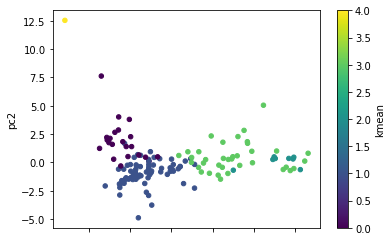

In [26]:
finalDf.plot.scatter(x='pc1',y='pc2',c='kmean',colormap = 'viridis')